<a href="https://colab.research.google.com/github/MR-Toufigh/Basics-of-intelligent-systems-fall-2024/blob/main/The_second_mini_project_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install --upgrade --no-cache-dir gdown -q
!gdown 1dphWsIlJu4_OL4CzdVFWvqtr0ZDhB9Rk
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1dphWsIlJu4_OL4CzdVFWvqtr0ZDhB9Rk
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 16.7MB/s]
Archive:  PersianData.zip
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [87]:
from PIL import Image, ImageDraw
import numpy as np

random.seed(13)
np.random.seed(13)

In [77]:


def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Convert the image to a NumPy array for faster processing.
    image_array = np.array(image)

    # Define a factor for intensity thresholding.
    factor = 100

    # Calculate the total intensity of each pixel.
    total_intensity = image_array[:, :, :3].sum(axis=2)

    # Determine the binary representation based on the intensity threshold.
    threshold = ((255 + factor) // 2) * 3
    binary_representation = np.where(total_intensity > threshold, -1, 1).flatten().tolist()

    # Update the image array with white or black pixels.
    processed_image_array = np.where(total_intensity[:, :, None] > threshold, 255, 0)

    # Convert the processed array back to an image.
    processed_image = Image.fromarray(processed_image_array.astype('uint8'), 'RGB')

    # Save or modify the processed image if needed (currently not saving it).

    # Return the binary representation of the image.
    return binary_representation


In [75]:
from PIL import Image, ImageDraw
import random



def generateNoisyImages(noise_factor=700):
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy_{noise_factor}_{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path, noise_factor)

def getNoisyBinaryImage(input_path, output_path, noise_factor):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
        noise_factor (int): The factor determining the level of noise to add.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw




=== Testing Noise Factor = 150 ===
Noisy Image 1 -> Predicted: 1 | Correct
Noisy Image 2 -> Predicted: 2 | Correct
Noisy Image 3 -> Predicted: 3 | Correct
Noisy Image 4 -> Predicted: 4 | Correct
Noisy Image 5 -> Predicted: 5 | Correct


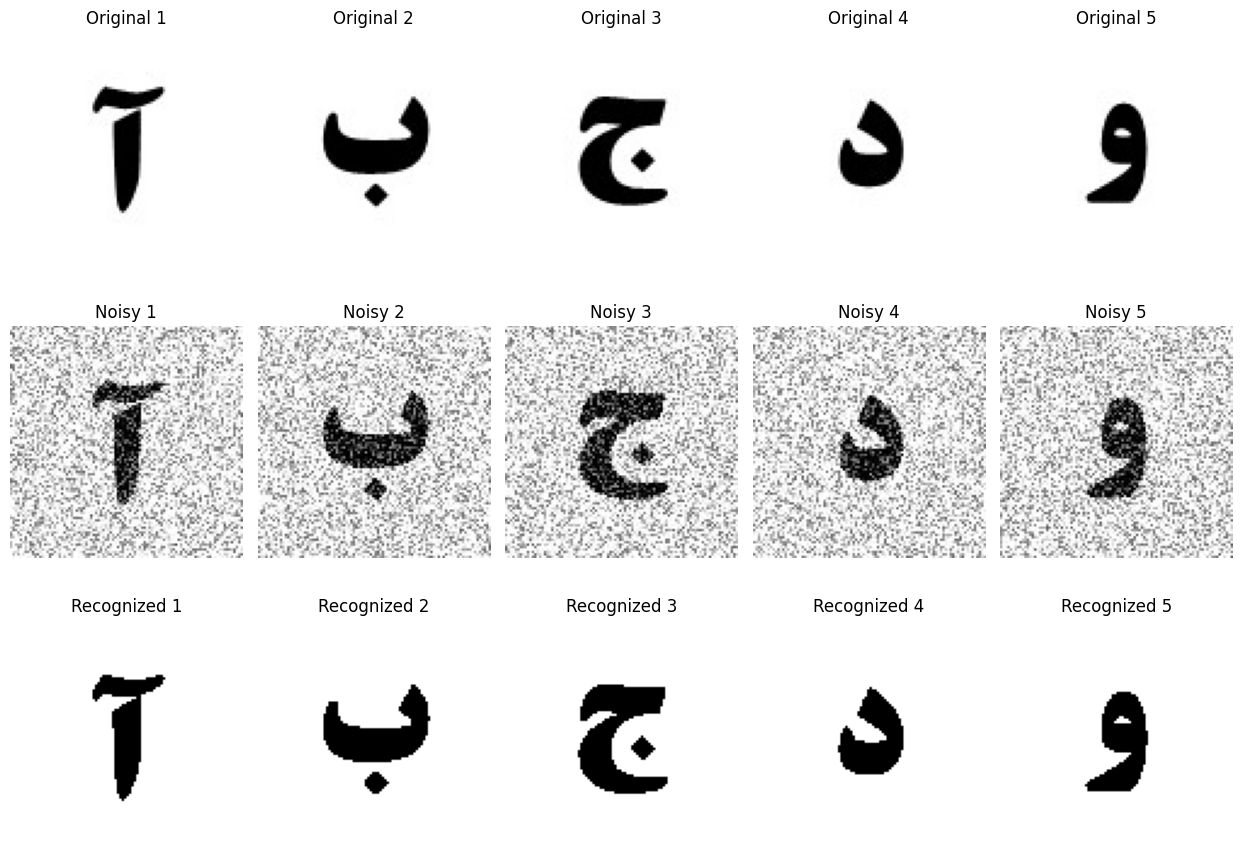


=== Testing Noise Factor = 325 ===
Noisy Image 1 -> Predicted: 1 | Correct
Noisy Image 2 -> Predicted: 2 | Correct
Noisy Image 3 -> Predicted: 3 | Correct
Noisy Image 4 -> Predicted: 4 | Correct
Noisy Image 5 -> Predicted: 5 | Correct


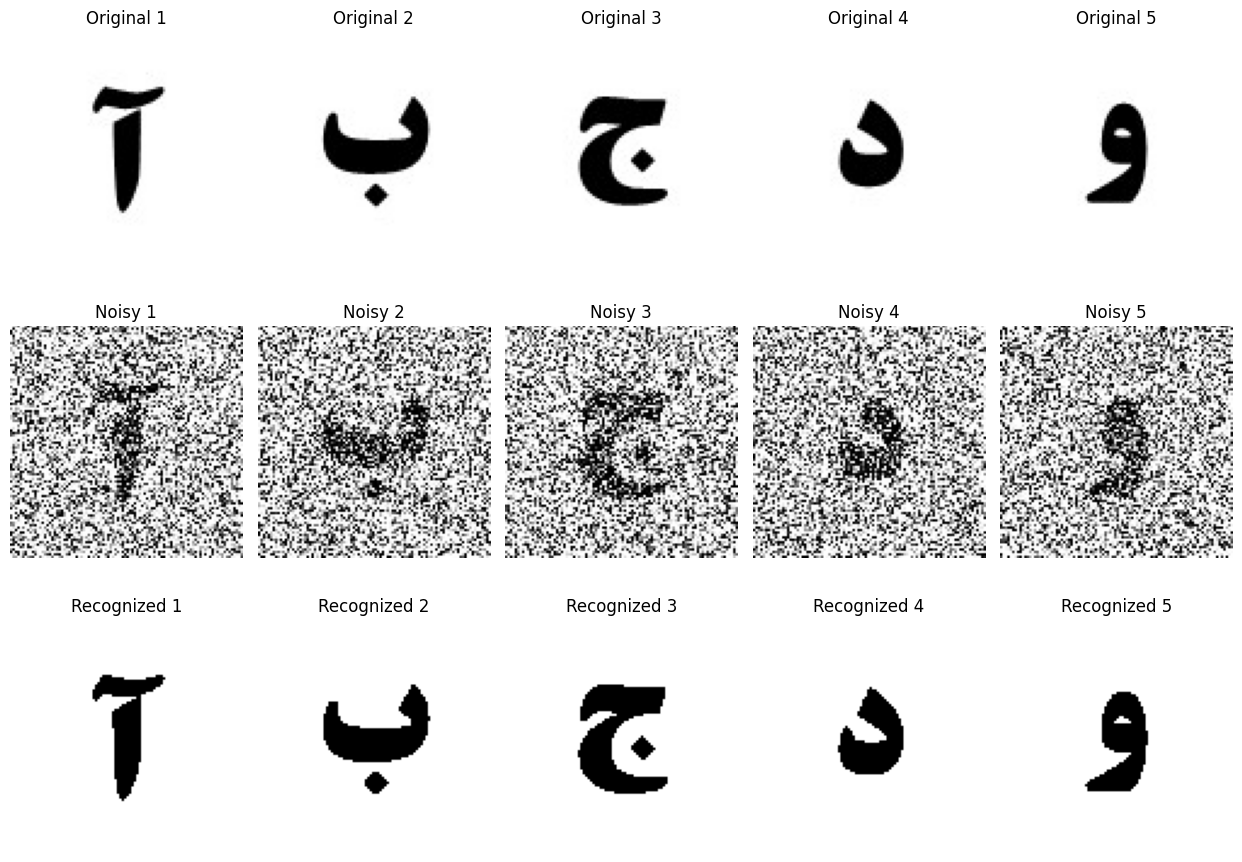


=== Testing Noise Factor = 588 ===
Noisy Image 1 -> Predicted: 1 | Correct
Noisy Image 2 -> Predicted: 2 | Correct
Noisy Image 3 -> Predicted: 3 | Correct
Noisy Image 4 -> Predicted: 4 | Correct
Noisy Image 5 -> Predicted: 5 | Correct


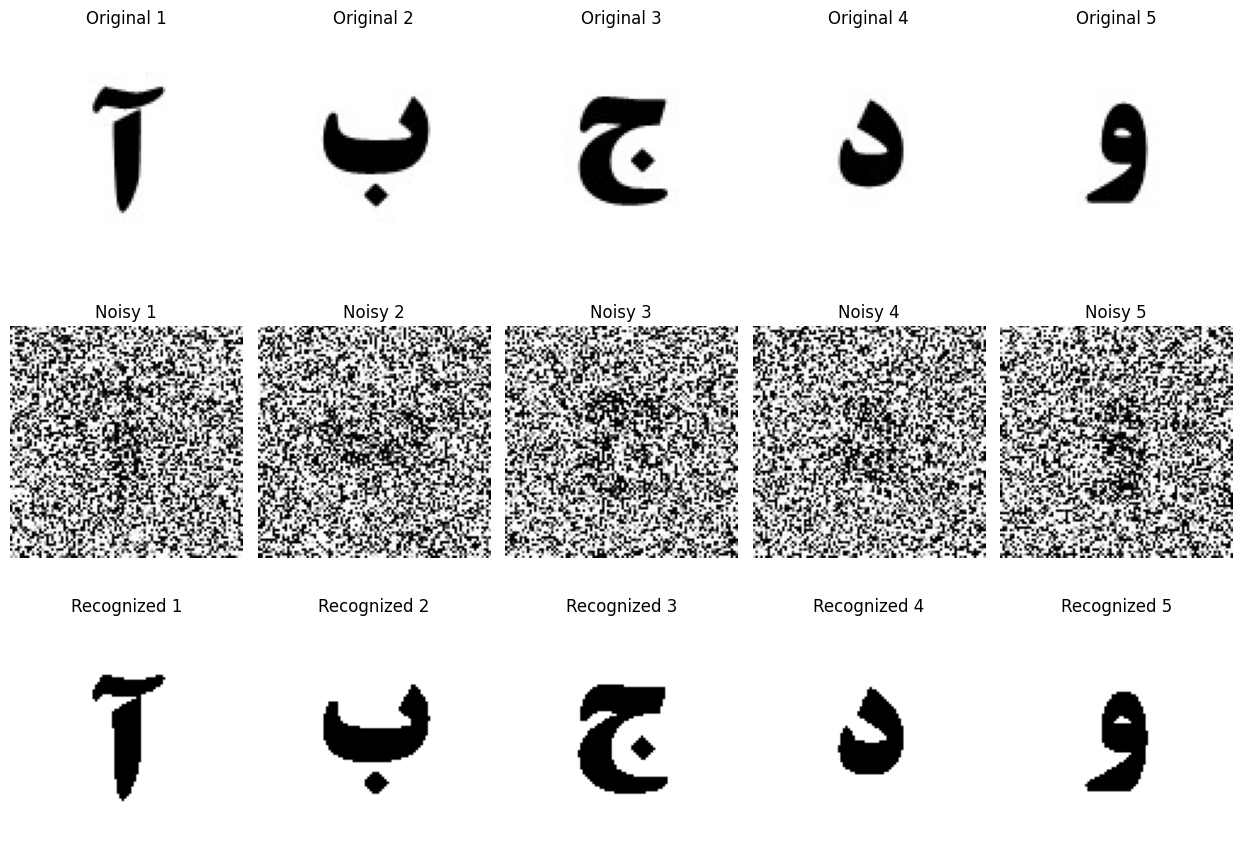


=== Testing Noise Factor = 982 ===
Noisy Image 1 -> Predicted: 1 | Correct
Noisy Image 2 -> Predicted: 2 | Correct
Noisy Image 3 -> Predicted: 3 | Correct
Noisy Image 4 -> Predicted: 4 | Correct
Noisy Image 5 -> Predicted: 5 | Correct


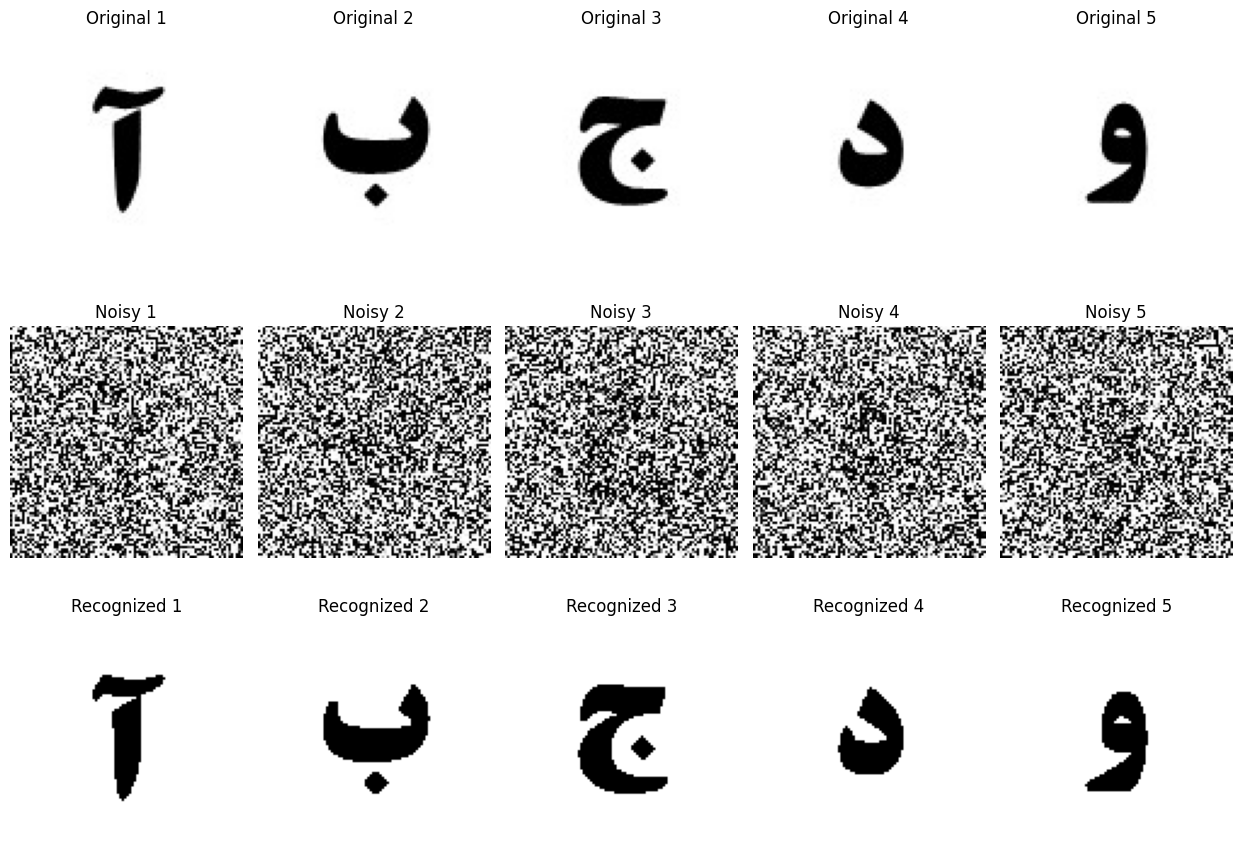


=== Testing Noise Factor = 1573 ===
Noisy Image 1 -> Predicted: 1 | Correct
Noisy Image 2 -> Predicted: 2 | Correct
Noisy Image 3 -> Predicted: 3 | Correct
Noisy Image 4 -> Predicted: 5 | Incorrect


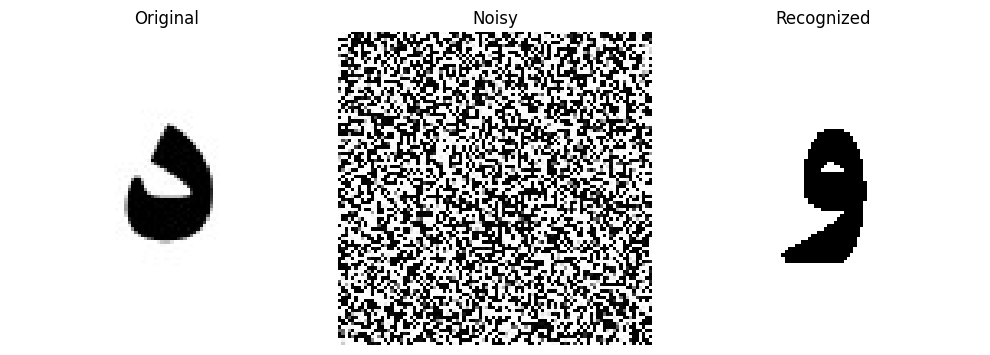

Network failed at noise factor = 1573


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# -----------------------------------------------------------
# Utility functions
# -----------------------------------------------------------


def binaryVectorToImage(binary_vector, width, height):
    """
    Convert a ±1 binary vector back to a black/white PIL image.

    Args:
        binary_vector (list or np.array): The ±1 representation of the image.
        width (int):  The width of the original image.
        height (int): The height of the original image.

    Returns:
        PIL.Image: A black-and-white PIL image corresponding to the binary vector.
    """
    img = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(img)

    idx = 0
    for x in range(width):
        for y in range(height):
            if binary_vector[idx] == 1:
                draw.point((x, y), (0, 0, 0))  # black pixel
            else:
                draw.point((x, y), (255, 255, 255))  # white pixel
            idx += 1

    del draw
    return img

def getImageSize(path):
    """
    Return (width, height) of the image at 'path'.
    """
    with Image.open(path) as img:
        return img.size

def hamming_classify(x, W):
    """
    Given an input vector x (shape: (N,)) and a weight matrix W (shape: (N, 5)),
    return the index of the prototype with the highest similarity (dot product).
    """
    scores = np.dot(x, W)   # shape: (5,)
    return np.argmax(scores)  # returns integer in [0..4]


def displayImagesGrid(original_paths, noisy_paths, recognized_vectors):
    """
    Display the original images, noisy images, and recognized images (from the Hamming network)
    in a 3x5 grid using matplotlib.

    Each column corresponds to one set of images.
    """
    if len(original_paths) != len(noisy_paths) or len(original_paths) != len(recognized_vectors):
        raise ValueError("All input arrays must have the same length.")

    num_images = len(original_paths)
    cols = num_images
    rows = 3  # Original, Noisy, Recognized

    plt.figure(figsize=(15, 9))  # Adjust the figure size for better visualization

    for i in range(1,6):
        try:
            # Validate the paths
            if not original_paths[i] or not noisy_paths[i]:
                raise ValueError(f"Path is None or empty for image {i + 1}.")

            # Load the images
            original_img = Image.open(original_paths[i])
            noisy_img = Image.open(noisy_paths[i])

            # Get recognized image
            width, height = original_img.size
            recognized_img = binaryVectorToImage(recognized_vectors[i], width, height)

            # Display the original image
            plt.subplot(rows, cols, i + 1)
            plt.imshow(original_img)
            plt.title(f"Original {i }")
            plt.axis('off')

            # Display the noisy image
            plt.subplot(rows, cols, cols + i + 1)
            plt.imshow(noisy_img)
            plt.title(f"Noisy {i }")
            plt.axis('off')

            # Display the recognized image
            plt.subplot(rows, cols, 2 * cols + i + 1)
            plt.imshow(recognized_img)
            plt.title(f"Recognized {i }")
            plt.axis('off')

        except Exception as e:
            print(f"Error processing image {i + 1}: {e}")

    plt.tight_layout()
    plt.show()

def displayImage(original_path, noisy_path, recognized_vector):
    """
    Display the original image, noisy image, and recognized image (from the Hamming network)
    side-by-side using matplotlib.
    """
    original_img = Image.open(original_path)
    noisy_img = Image.open(noisy_path)

    width, height = original_img.size

    recognized_img = binaryVectorToImage(recognized_vector, width, height)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(noisy_img)
    plt.title("Noisy")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(recognized_img)
    plt.title("Recognized")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------
# 1. Load and convert the 5 original images to ±1 vectors
# -----------------------------------------------------------
image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

training_vectors = []
for path in image_paths:
    vec = convertImageToBinary(path)  # convertImageToBinary() must be pre-defined
    training_vectors.append(vec)

training_matrix = np.array(training_vectors)  # shape: (5, N)
W = training_matrix.T  # shape: (N, 5)

# -----------------------------------------------------------
# 2. Increment noise factor and stop when a mistake occurs
# -----------------------------------------------------------
noise_factor = 150
original_img_path = [None] * 6  # لیست با 6 عنصر برای ذخیره مسیرها
noisy_img_path = [None] * 6    # مشابه برای مسیر تصاویر نویزی
recognized_vector = [None] * 6  # برای ذخیره بردارهای شناسایی‌شده

while True:


    print(f"\n=== Testing Noise Factor = {noise_factor} ===")
    generateNoisyImages(noise_factor=noise_factor)  # generate noisy images

    error_found = False

    for i in range(1, 6):
        original_img_path [i] = f"/content/{i}.jpg"
        noisy_img_path [i] = f"/content/noisy_{noise_factor}_{i}.jpg"

        noisy_vec = convertImageToBinary(noisy_img_path [i])
        predicted_label = hamming_classify(noisy_vec, W)
        recognized_vector[i] = training_vectors[predicted_label]

        is_correct = (predicted_label == (i - 1))
        if not is_correct:
            print(f"Noisy Image {i} -> Predicted: {predicted_label+1} | Incorrect")
            error_found = True
            displayImage(original_img_path[i], noisy_img_path[i], recognized_vector[i])

            break
        else:
            print(f"Noisy Image {i} -> Predicted: {predicted_label+1} | Correct")

    if error_found:
        print(f"Network failed at noise factor = {noise_factor}")
        break
    displayImagesGrid(original_img_path, noisy_img_path, recognized_vector)

    noise_factor = round(noise_factor*1.5)+100



=== Testing Missing Point Factor = 450 ===
Modified Image 1 -> Predicted: 1 | Correct
Modified Image 2 -> Predicted: 2 | Correct
Modified Image 3 -> Predicted: 3 | Correct
Modified Image 4 -> Predicted: 4 | Correct
Modified Image 5 -> Predicted: 5 | Correct


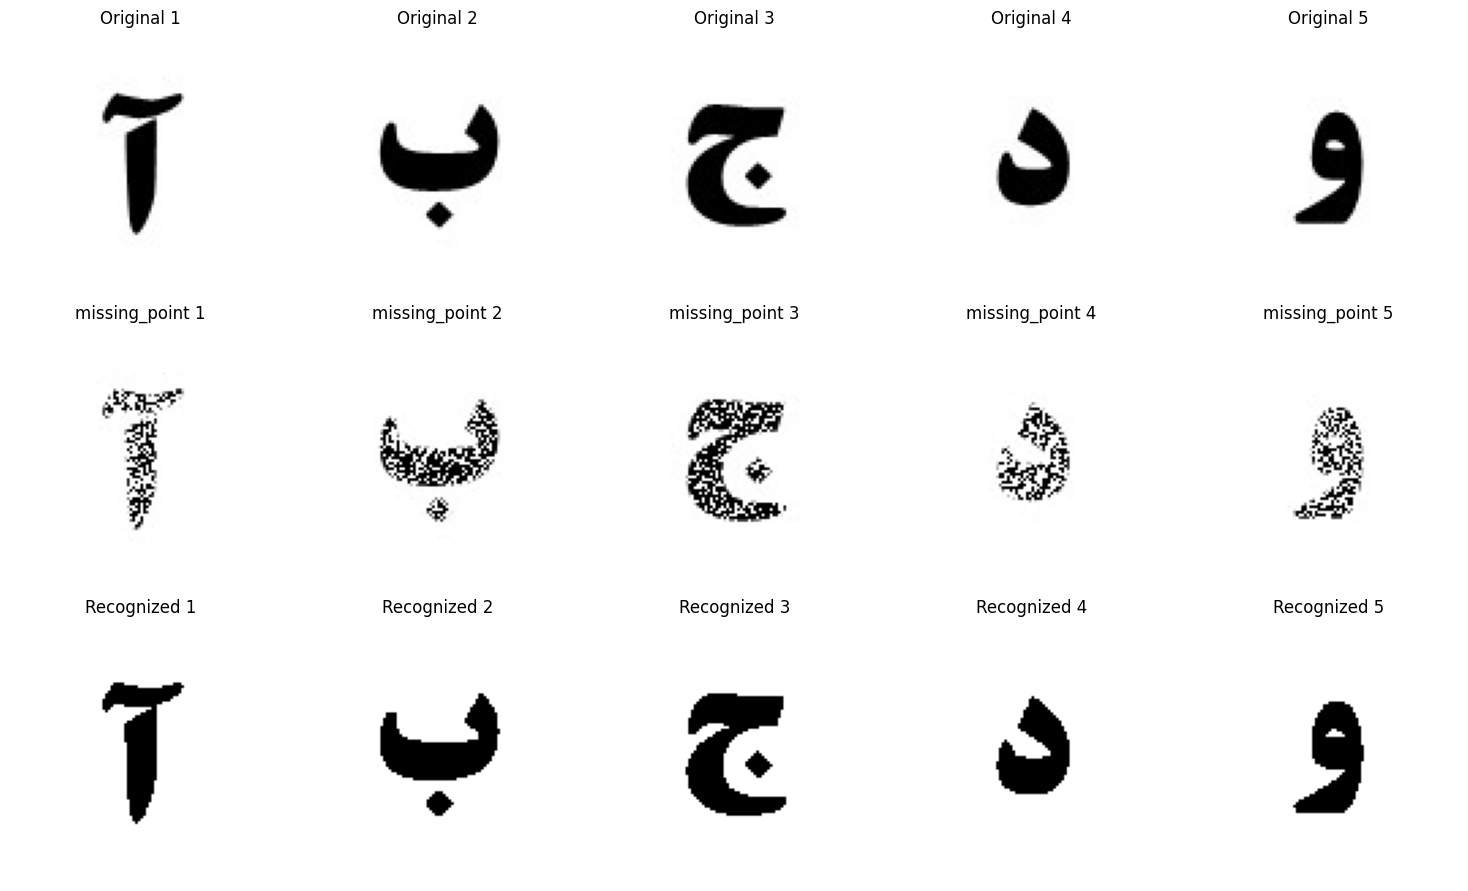


=== Testing Missing Point Factor = 550 ===
Modified Image 1 -> Predicted: 1 | Correct
Modified Image 2 -> Predicted: 2 | Correct
Modified Image 3 -> Predicted: 3 | Correct
Modified Image 4 -> Predicted: 4 | Correct
Modified Image 5 -> Predicted: 5 | Correct


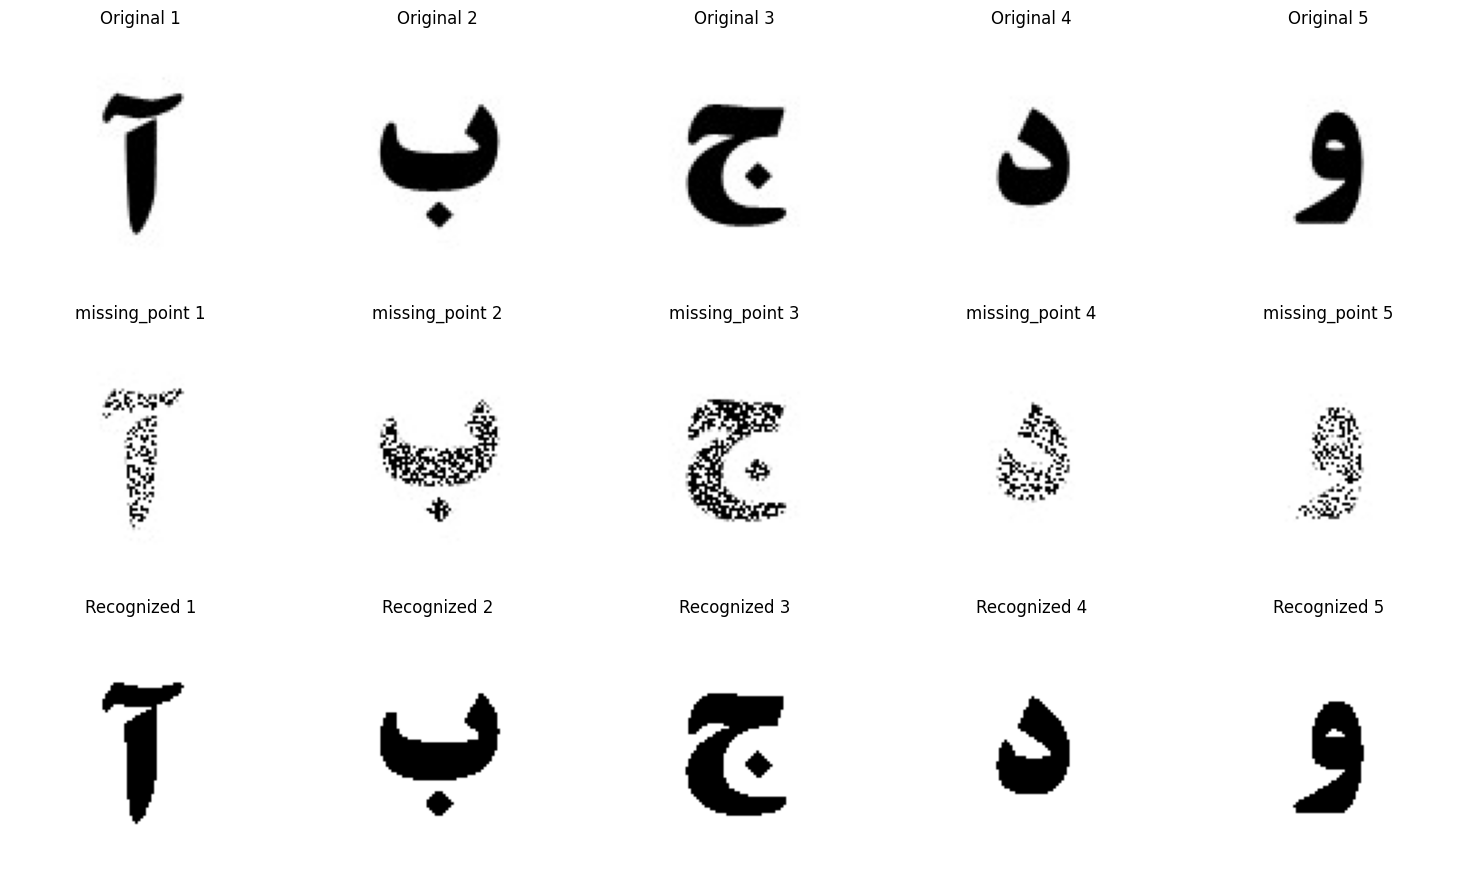


=== Testing Missing Point Factor = 650 ===
Modified Image 1 -> Predicted: 1 | Correct
Modified Image 2 -> Predicted: 2 | Correct
Modified Image 3 -> Predicted: 3 | Correct
Modified Image 4 -> Predicted: 4 | Correct
Modified Image 5 -> Predicted: 5 | Correct


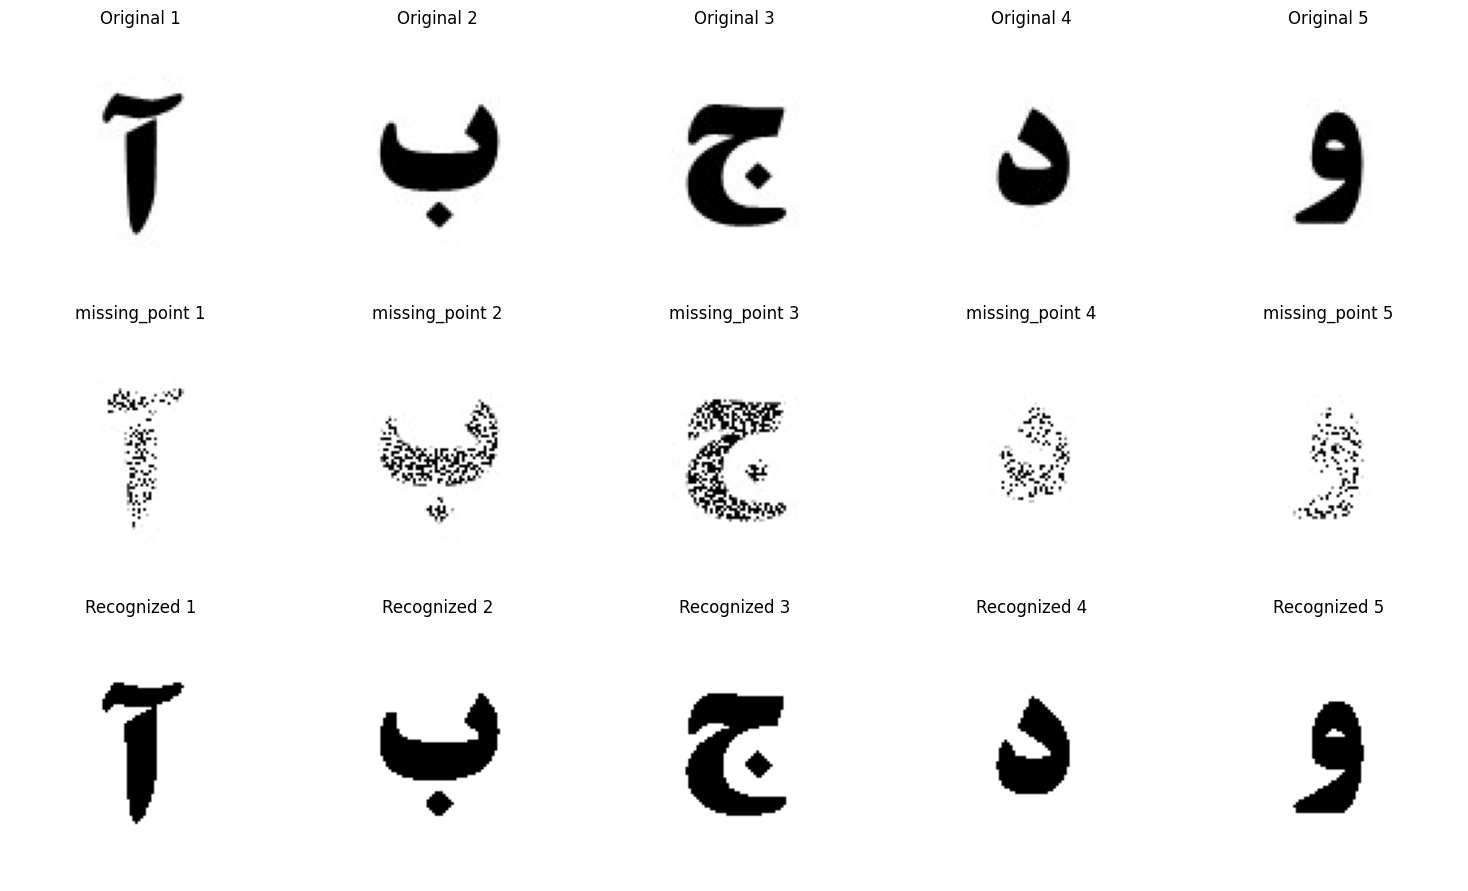


=== Testing Missing Point Factor = 750 ===
Modified Image 1 -> Predicted: 1 | Correct
Modified Image 2 -> Predicted: 2 | Correct
Modified Image 3 -> Predicted: 3 | Correct
Modified Image 4 -> Predicted: 4 | Correct
Modified Image 5 -> Predicted: 5 | Correct


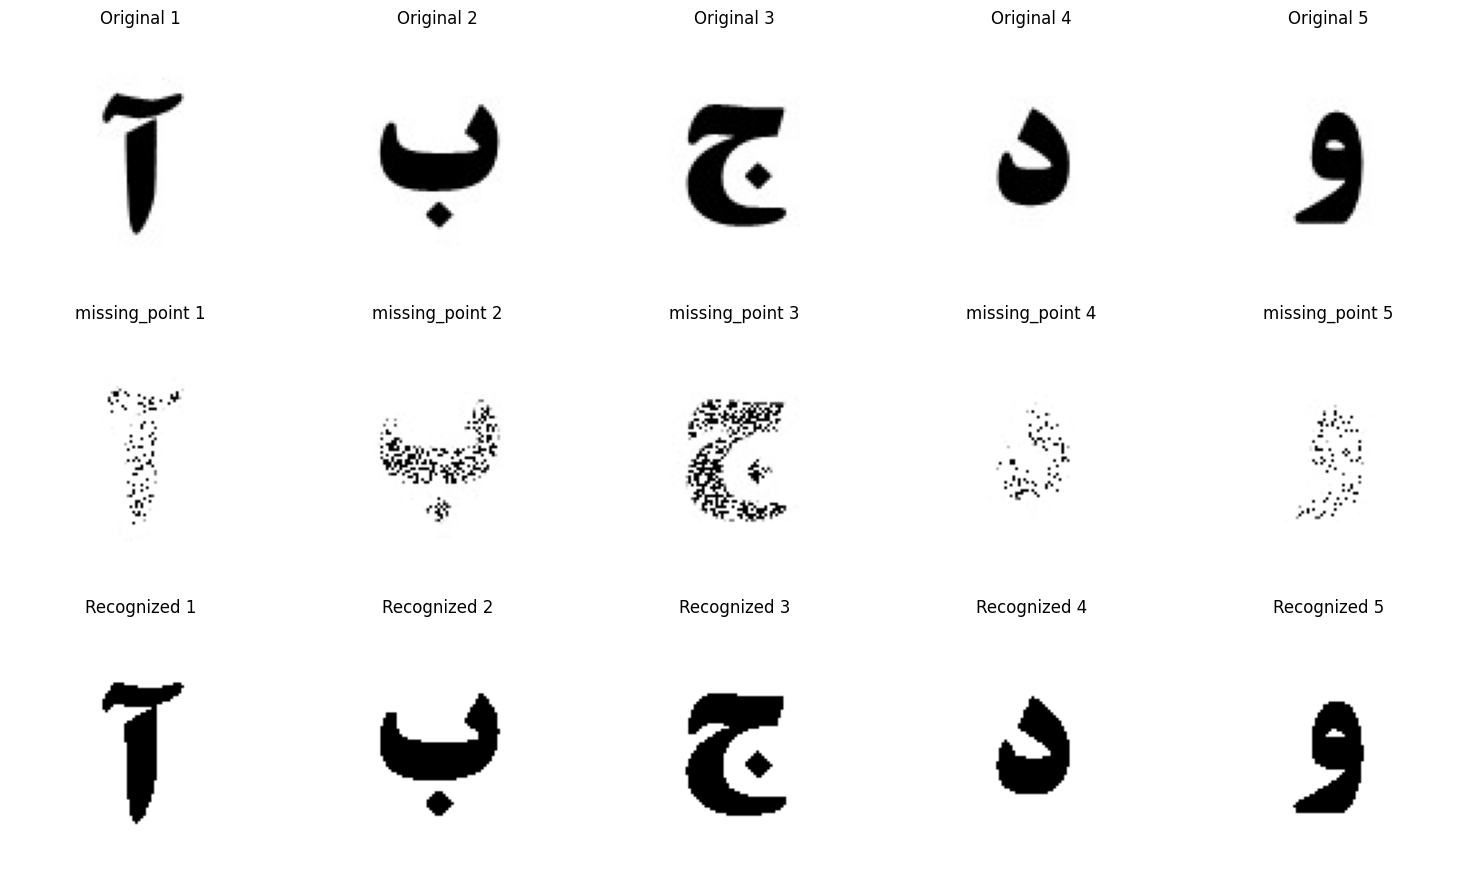


=== Testing Missing Point Factor = 850 ===
Modified Image 1 -> Predicted: 1 | Correct
Modified Image 2 -> Predicted: 2 | Correct
Modified Image 3 -> Predicted: 3 | Correct
Modified Image 4 -> Predicted: 4 | Correct
Modified Image 5 -> Predicted: 4 | Incorrect


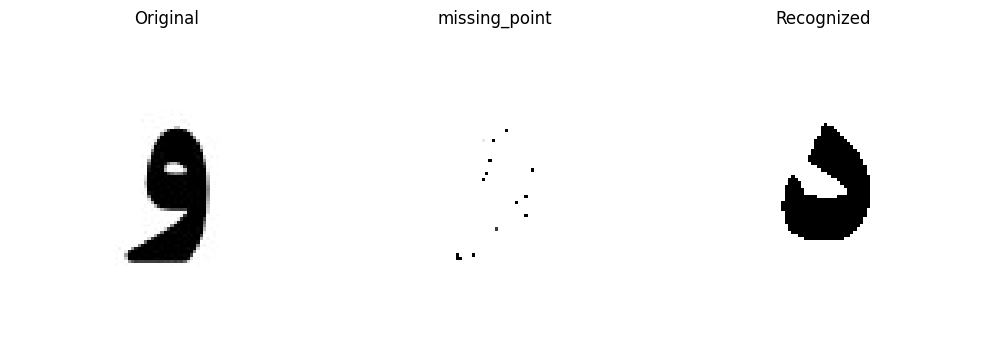

Network failed at missing point factor = 850


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

np.random.seed(13)

def generateMissingPointImage(input_path, output_path, missing_point_factor):
    """
    Gradually change black and gray pixels into white to simulate missing points.

    Args:
        input_path (str): Path to the input image.
        output_path (str): Path to save the modified image.
        missing_point_factor (int): Number of black/gray pixels to turn into white.
    """
    image = Image.open(input_path)

    width, height = image.size
    pix = image.load()

    # Collect black and gray pixels (intensity < 255 threshold)
    dark_pixels = [(x, y) for x in range(width) for y in range(height) if len(pix[x, y]) == 3 and (pix[x, y][0] < 255 or pix[x, y][1] < 255 or pix[x, y][2] < 255)]

    if len(dark_pixels) < missing_point_factor:
        missing_point_factor = len(dark_pixels)  # Cap to available dark pixels

    missing_points = np.random.choice(len(dark_pixels), missing_point_factor, replace=False)

    for idx in missing_points:
        x, y = dark_pixels[idx]
        pix[x, y] = (255, 255, 255)  # Change pixel to white

    image.save(output_path, "PNG")


def displayImagesGrid(original_paths, noisy_paths, recognized_vectors):
    """
    Display the original images, noisy images, and recognized images (from the Hamming network)
    in a 3x5 grid using matplotlib.

    Each column corresponds to one set of images.
    """
    if len(original_paths) != len(noisy_paths) or len(original_paths) != len(recognized_vectors):
        raise ValueError("All input arrays must have the same length.")

    num_images = len(original_paths)
    cols = num_images
    rows = 3  # Original, Noisy, Recognized

    plt.figure(figsize=(15, 9))  # Adjust the figure size for better visualization

    for i in range(num_images):
        try:
            # Validate the paths
            if not original_paths[i] or not noisy_paths[i]:
                raise ValueError(f"Path is None or empty for image {i + 1}.")

            # Load the images
            original_img = Image.open(original_paths[i])
            noisy_img = Image.open(noisy_paths[i])

            # Get recognized image
            width, height = original_img.size
            recognized_img = binaryVectorToImage(recognized_vectors[i], width, height)

            # Display the original image
            plt.subplot(rows, cols, i + 1)
            plt.imshow(original_img)
            plt.title(f"Original {i + 1 }")
            plt.axis('off')

            # Display the noisy image
            plt.subplot(rows, cols, cols + i + 1)
            plt.imshow(noisy_img)
            plt.title(f"missing_point {i + 1 }")
            plt.axis('off')

            # Display the recognized image
            plt.subplot(rows, cols, 2 * cols + i + 1)
            plt.imshow(recognized_img)
            plt.title(f"Recognized {i + 1 }")
            plt.axis('off')

        except Exception as e:
            print(f"Error processing image {i + 1}: {e}")

    plt.tight_layout()
    plt.show()

def displayImage(original_path, noisy_path, recognized_vector):
    """
    Display the original image, noisy image, and recognized image (from the Hamming network)
    side-by-side using matplotlib.
    """
    original_img = Image.open(original_path)
    noisy_img = Image.open(noisy_path)

    width, height = original_img.size

    recognized_img = binaryVectorToImage(recognized_vector, width, height)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(noisy_img)
    plt.title("missing_point")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(recognized_img)
    plt.title("Recognized")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------
# 2. Increment missing point factor and stop when a mistake occurs
# -----------------------------------------------------------
missing_point_factor = 450
original_img_path = [None] * 5  # لیست با 6 عنصر برای ذخیره مسیرها
modified_img_path = [None] * 5    # مشابه برای مسیر تصاویر نویزی
recognized_vector = [None] * 5  # برای ذخیره بردارهای شناسایی‌شده

while True:
    print(f"\n=== Testing Missing Point Factor = {missing_point_factor} ===")

    error_found = False

    for i in range(1, 6):
        original_img_path [i - 1] = f"/content/{i}.jpg"
        modified_img_path [i - 1] = f"/content/missing_{missing_point_factor}_{i}.png"

        generateMissingPointImage(original_img_path [i - 1], modified_img_path [i - 1], missing_point_factor)

        modified_vec = convertImageToBinary(modified_img_path [i - 1])
        predicted_label = hamming_classify(modified_vec, W)
        recognized_vector [i - 1] = training_vectors[predicted_label]

        is_correct = (predicted_label == (i - 1))
        if not is_correct:
            print(f"Modified Image {i} -> Predicted: {predicted_label+1} | Incorrect")
            error_found = True
            displayImage(original_img_path [i - 1], modified_img_path [i - 1], recognized_vector [i - 1])

            break
        else:
            print(f"Modified Image {i} -> Predicted: {predicted_label+1} | Correct")

    if error_found:
        print(f"Network failed at missing point factor = {missing_point_factor}")
        break
    displayImagesGrid(original_img_path, modified_img_path, recognized_vector)
    missing_point_factor =  round( missing_point_factor)+100
